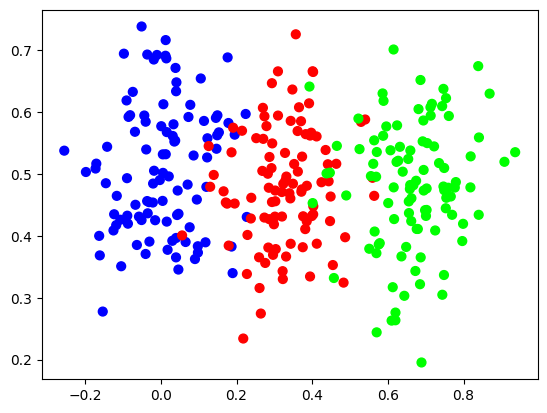

In [1]:
# test first
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data

nnfs.init()

X, y = vertical_data(samples=100, classes=3)

plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap='brg')
plt.show()

In [3]:
# it's implementation time

import numpy as np
import nnfs 
from nnfs.datasets import vertical_data

nnfs.init()

np.random.seed(0)

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = norm_values

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        data_loss = np.mean(sample_losses)
        return data_loss

class Loss_CategoricalCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        samples = len(y_pred)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
        
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
        negative_log = -np.log(correct_confidences)
        return negative_log

X, y = vertical_data(samples=100, classes=3)
dense1 = Layer_Dense(2,3)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()

lowest_loss = 9999999
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(10000):
    dense1.weights += 0.05 * np.random.randn(2,3)
    dense1.biases += 0.05 * np.random.randn(1,3)
    dense2.weights += 0.05 * np.random.randn(3,3)
    dense2.biases += 0.05 * np.random.randn(1,3)
    
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    loss = loss_function.calculate(activation2.output, y)
    
    predictions = np.argmax(activation2.output, axis=1)
    accuracy = np.mean(predictions==y)
    
    if loss < lowest_loss:
        print('New set of weights found, iteration:', iteration, 'loss:', loss, 'acc:', accuracy)
        best_dense1_weights = dense1.weights.copy()
        best_dense1_biases = dense1.biases.copy()
        best_dense2_weights = dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
        lowest_loss = loss
    else:
        dense1.weights = best_dense1_weights.copy()
        dense1.biases = best_dense1_biases.copy()
        dense2.weights = best_dense2_weights.copy()
        dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.0984223 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0983797 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0973538 acc: 0.33666666666666667
New set of weights found, iteration: 6 loss: 1.0963587 acc: 0.26666666666666666
New set of weights found, iteration: 8 loss: 1.0953789 acc: 0.34
New set of weights found, iteration: 14 loss: 1.095357 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0940696 acc: 0.3333333333333333
New set of weights found, iteration: 24 loss: 1.0937893 acc: 0.3333333333333333
New set of weights found, iteration: 25 loss: 1.0903312 acc: 0.62
New set of weights found, iteration: 27 loss: 1.0894265 acc: 0.3333333333333333
New set of weights found, iteration: 28 loss: 1.0862789 acc: 0.3333333333333333
New set of weights found, iteration: 29 loss: 1.0799779 acc: 0.5933333333333334
New set of weights found, iteration: 30 loss: 1.0792155 acc: 0.48
New se